In [77]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import tree
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [63]:
heart = pd.read_csv('/Users/exam/Documents/Nishant/ML/HeartDisease.csv')

In [64]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class_actual,class_predict
0,63,1,3,145.0,233,1,0,150,0.0,2.3,0,0,1,1,1
1,37,1,2,130.0,250,0,1,187,0.0,3.5,0,0,2,1,1
2,41,0,1,130.0,204,0,0,172,0.0,1.4,2,0,2,1,1
3,56,1,1,120.0,236,0,1,178,0.0,0.8,2,0,2,1,1
4,57,0,0,120.0,354,0,1,163,1.0,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,65,1,0,NaN,248,0,0,158,0.0,0.6,2,2,1,0,0
306,44,1,0,110.0,197,0,0,177,NaN,0.0,2,1,2,0,0
307,63,1,3,145.0,233,1,0,150,0.0,230.0,0,0,1,1,1
308,50,0,2,120.0,219,0,1,158,0.0,1.6,1,0,2,1,1


In [65]:
heart.drop('class_predict',axis=1, inplace=True)
heart.dropna(inplace=True)

In [66]:
inputs = heart.iloc[:,:-1]
target = heart.iloc[:,-1:]

In [67]:
input_train, input_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.1)

## SVC : Confusion matrix and classification report

In [76]:
svc = SVC(kernel='linear')
svc.fit(input_train, target_train)
predict_target = svc.predict(input_test)
print('Confusion matrix : \n',confusion_matrix(target_test, predict_target))
print('Classisfication report : \n',classification_report(target_test, predict_target))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix : 
 [[11  6]
 [ 0 14]]
Classisfication report : 
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.70      1.00      0.82        14

    accuracy                           0.81        31
   macro avg       0.85      0.82      0.80        31
weighted avg       0.86      0.81      0.80        31



## Decision tree : confusion matrix and Classification report

In [71]:
model = tree.DecisionTreeClassifier()
model.fit(input_train, target_train)

predict_target = model.predict(input_test)

print('Confusion matrix : \n',confusion_matrix(target_test, predict_target))
print('Classisfication report : \n',classification_report(target_test, predict_target))

Confusion matrix : 
 [[13  4]
 [ 2 12]]
Classisfication report : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



## Ploting Roc curve

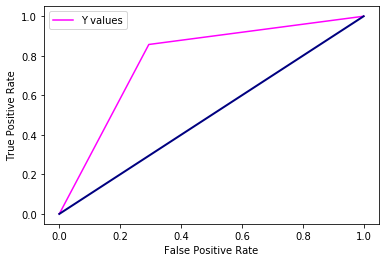

In [69]:
fpr, tpr, _ = roc_curve(target_test, predict_target)
plt.plot(fpr, tpr, linestyle = '-', label = 'Y values', color = 'magenta')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '-')
plt.show()

## Cohen kappa score

In [70]:
kappa = cohen_kappa_score(target_test, predict_target)
print('Cohen kappa : %0.4f' % kappa)
auc = roc_auc_score(target_test, predict_target)
print('ROC AUC : %0.4f' % auc)

Cohen kappa : 0.5526
ROC AUC : 0.7815


## Singular value decomposition

In [84]:
svd = TruncatedSVD(n_components=1)
features_svd = svd.fit_transform(heart)

print('Original : ', heart.shape[1])
print('Reduced : ', features_svd.shape[1])

Original :  14
Reduced :  1
